In [4]:
# Import libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Download ticker prices for the last 2 years
ticker = ["AAPL", "NVDA", "META", "MSFT"]

data = yf.download(ticker, period="2y", auto_adjust=True)
data.tail

[*********************100%***********************]  4 of 4 completed


<bound method NDFrame.tail of Price            Close                                            High  \
Ticker            AAPL        META        MSFT        NVDA        AAPL   
Date                                                                     
2023-11-15  186.251053  330.671509  364.920959   48.859200  187.727118   
2023-11-16  187.935150  332.142487  371.337463   49.450855  189.173456   
2023-11-17  187.915344  332.987213  365.098663   49.268963  188.598891   
2023-11-20  189.658890  337.886993  372.591156   50.379311  190.114593   
2023-11-21  188.856445  334.915344  368.277313   49.914581  189.728217   
...                ...         ...         ...         ...         ...   
2025-11-10  269.429993  631.760010  506.000000  199.050003  273.730011   
2025-11-11  275.250000  627.080017  508.679993  193.160004  275.910004   
2025-11-12  273.470001  609.010010  511.140015  193.800003  275.730011   
2025-11-13  272.950012  609.890015  503.290009  186.860001  276.700012   
2025-11-

In [6]:
# Filter closing prices for all tickers

prices = data["Close"]
prices 

Ticker,AAPL,META,MSFT,NVDA
Date,,,,
2023-11-15,186.251053,330.671509,364.920959,48.859200
2023-11-16,187.935150,332.142487,371.337463,49.450855
2023-11-17,187.915344,332.987213,365.098663,49.268963
2023-11-20,189.658890,337.886993,372.591156,50.379311
2023-11-21,188.856445,334.915344,368.277313,49.914581
...,...,...,...,...
2025-11-10,269.429993,631.760010,506.000000,199.050003
2025-11-11,275.250000,627.080017,508.679993,193.160004
2025-11-12,273.470001,609.010010,511.140015,193.800003


In [7]:
# Computing returns of each ticker 

rets = prices.pct_change().dropna()
rets

Ticker,AAPL,META,MSFT,NVDA
Date,,,,
2023-11-16,0.009042,0.004448,0.017583,0.012109
2023-11-17,-0.000105,0.002543,-0.016801,-0.003678
2023-11-20,0.009278,0.014715,0.020522,0.022536
2023-11-21,-0.004231,-0.008795,-0.011578,-0.009225
2023-11-22,0.003514,0.013384,0.012812,-0.024588
...,...,...,...,...
2025-11-10,0.004549,0.016165,0.018478,0.057933
2025-11-11,0.021601,-0.007408,0.005296,-0.029591
2025-11-12,-0.006467,-0.028816,0.004836,0.003313


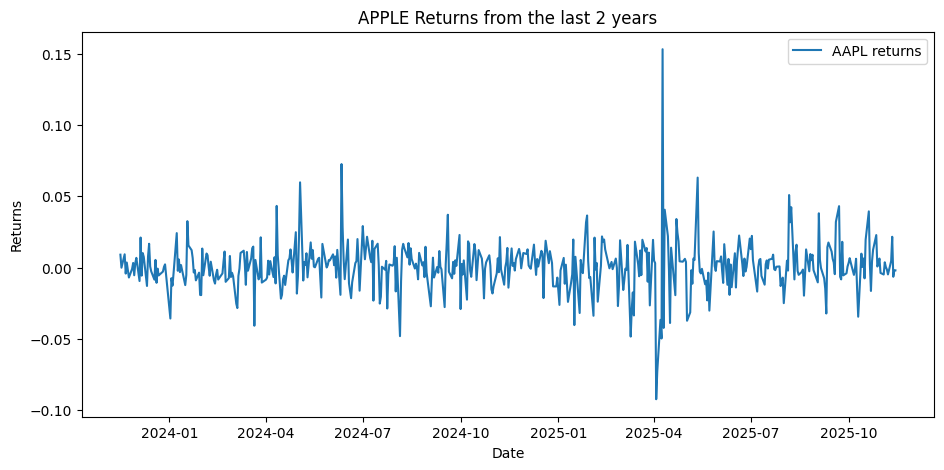

In [8]:
# Plot returns for each ticker

plt.figure(figsize=(11,5))
plt.plot(rets.index, rets["AAPL"], label="AAPL returns")

plt.title("APPLE Returns from the last 2 years")
plt.xlabel("Date"); plt.ylabel("Returns")
plt.legend()
plt.show()

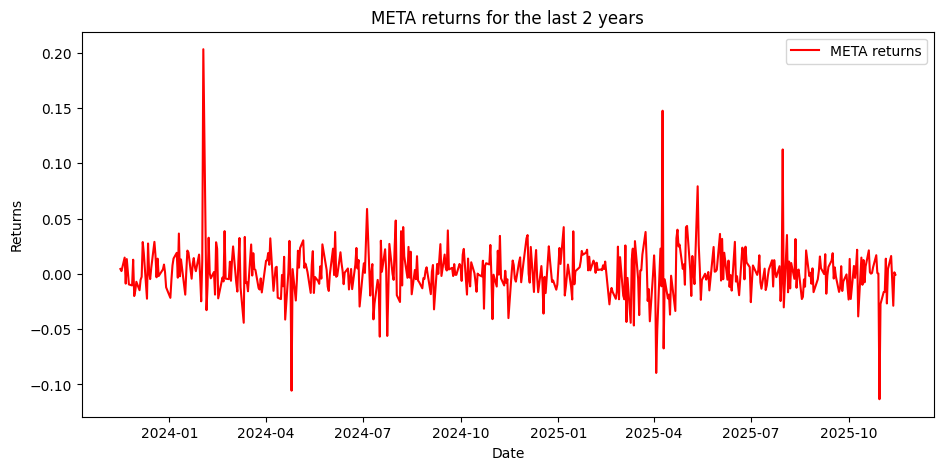

In [9]:
# Plot returns for META

plt.figure(figsize=(11,5))
plt.plot(rets.index, rets["META"], label="META returns", color="red")

plt.xlabel("Date"); plt.ylabel("Returns")
plt.title("META returns for the last 2 years")
plt.legend()
plt.show()

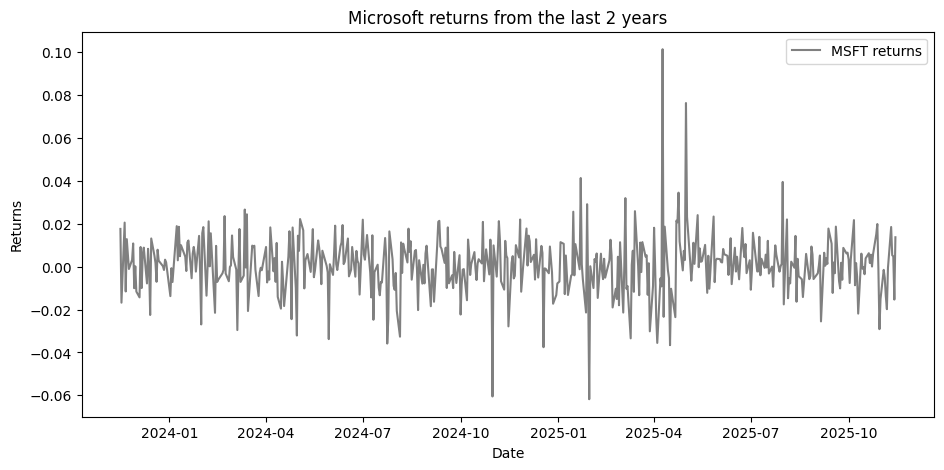

In [10]:
#  Plot returns for MSFT

plt.figure(figsize=(11,5))
plt.plot(rets.index, rets["MSFT"], label="MSFT returns", color="grey")

plt.xlabel("Date"); plt.ylabel("Returns")
plt.title("Microsoft returns from the last 2 years")
plt.legend()
plt.show()

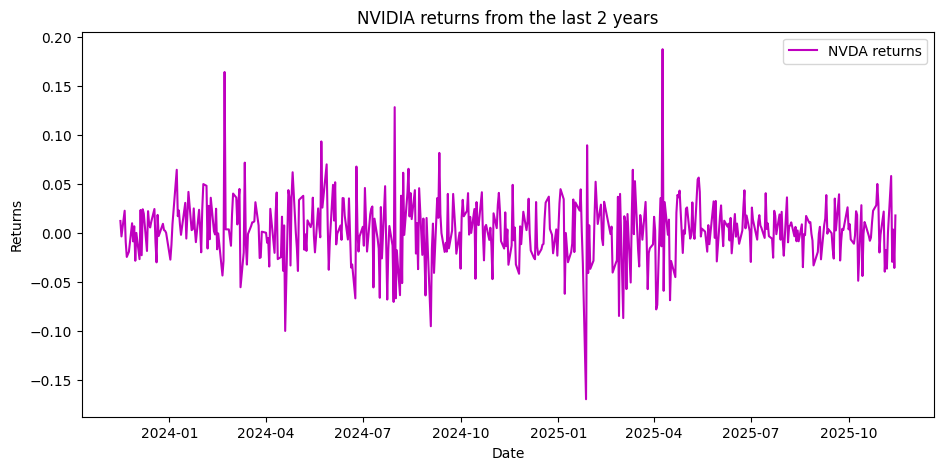

In [11]:
#  Plot returns for NVIDIA

plt.figure(figsize=(11,5))
plt.plot(rets.index, rets["NVDA"], label="NVDA returns", color="m")

plt.xlabel("Date"); plt.ylabel("Returns")
plt.title("NVIDIA returns from the last 2 years")
plt.legend()
plt.show()

In [12]:
# Computing correlations for each ticker

correlations_tickers = prices.corr()

In [13]:
correlations_tickers

Ticker,AAPL,META,MSFT,NVDA
Ticker,,,,
AAPL,1.000000,0.620057,0.518560,0.753221
META,0.620057,1.000000,0.789983,0.897717
MSFT,0.518560,0.789983,1.000000,0.867243
NVDA,0.753221,0.897717,0.867243,1.000000


In [1]:
# Computing Sharpe ratio

# First its necessary to install fredapi
!pip install fredapi

In [14]:
# Using the API from FRED

from fredapi import Fred

# Connect to FRED
fred = Fred(api_key=open("fred_key.txt").read().strip())

# Download 3-Month T-Bill Yield (DTB3) for 2023 - 2025
rf = fred.get_series("DTB3", observation_start="2023-11-14", observation_end="2025-11-11")

# Convert to DataFrame
rf = rf.to_frame(name="t_bill_rate")
rf.index = pd.to_datetime(rf.index)

# Convert to decimal
rf["t_bill_rate"] = rf["t_bill_rate"] / 100

# Compute annual risk-free rate (mean of entire period)
r_f_annual = rf["t_bill_rate"].mean()
print("Annual risk-free rate (2023-2025):", r_f_annual)

# Convert to daily risk-free rate
r_f_daily = (1 + r_f_annual)**(1/252) - 1
print("Daily risk-free rate:", r_f_daily)

Annual risk-free rate (2023-2025): 0.04624748490945674
Daily risk-free rate: 0.00017942061343312332


In [35]:
# Computing Sharpe ratio for all tickers

for i in rets.columns:
    # compute the mean daily returns for ticker i
    m_ret = rets[i].mean()
    std_ret = rets[i].std()
    s = (m_ret - r_f_daily) / std_ret
    print(f" Daily Sharpe ratio for {i}: {s}")

 Daily Sharpe ratio for AAPL: 0.04160860174612548
 Daily Sharpe ratio for META: 0.05594386011844252
 Daily Sharpe ratio for MSFT: 0.04214931732275372
 Daily Sharpe ratio for NVDA: 0.09500662257237985


In [36]:
# Converting daily Sharpe ratios to annual Sharpe ratios

for i in rets.columns:
    # compute the mean daily returns for ticker i
    m_ret = rets[i].mean()
    std_ret = rets[i].std()
    s = ((m_ret - r_f_daily) / std_ret) * (252**(1/2))
    print(f" Annual Sharpe ratio for {i}: {s}")

 Annual Sharpe ratio for AAPL: 0.6605160757282554
 Annual Sharpe ratio for META: 0.8880812475263001
 Annual Sharpe ratio for MSFT: 0.6690996694029187
 Annual Sharpe ratio for NVDA: 1.5081833773841564


## Interpretation (industry level)
Sharpe < 0.5 -> weak

0.5 - 1.0 -> good

1.0 - 2.0 -> very good

Greater than 2.0 -> exceptional (rare in real markets)

# Choosen stocks:

NVDA -> excellent risk-adjusted returns

META -> good 

AAPL/MSFT -> okay but not amazing

In [41]:
# Summary DataFrame

results_sharpe = [] # empty list

for i in rets.columns:
    m_ret = rets[i].mean()
    std_ret = rets[i].std()
    s_daily = (m_ret - r_f_daily) / std_ret
    s_annual = s_daily * (252 ** 0.5)

    results_sharpe.append({
    "Ticker": i,
    "Mean_Daily_Return": m_ret,
    "Daily_std": std_ret,
    "Sharpe_Daily": s_daily,
    "Sharpe_Annual": s_annual
    })

summary_df = pd.DataFrame(results_sharpe)

summary_df

,Ticker,Mean_Daily_Return,Daily_std,Sharpe_Daily,Sharpe_Annual
0,AAPL,0.000913,0.017620,0.041609,0.660516
1,META,0.001490,0.023427,0.055944,0.888081
2,MSFT,0.000765,0.013889,0.042149,0.669100
3,NVDA,0.003229,0.032094,0.095007,1.508183


In [42]:
# Save results to CSV
#summary_df.to_csv("sharpe_summary.csv", index=False)

In [43]:
# Cumulative returns - TBD!